In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

import pandas as pd
import xarray as xr
from netCDF4 import Dataset, num2date, date2num
from datetime import datetime, timedelta
import os

import seaborn as sns
import cmocean as cmocn

%matplotlib inline

In [4]:
ds = xr.open_dataset('../goodData_QSwithTAO.nc')

In [5]:
ds

<xarray.Dataset>
Dimensions:                           (count: 156953, TAO_TIME_INDEX: 73)
Coordinates:
  * count                             (count) int64 0 1 2 ... 244385 244386
  * TAO_TIME_INDEX                    (TAO_TIME_INDEX) int64 -36 -35 ... 35 36
Data variables: (12/1039)
    Wind Direction (TAO)              (count, TAO_TIME_INDEX) float32 ...
    WDIR_QC                           (count, TAO_TIME_INDEX) float32 ...
    WDIR_DM                           (count, TAO_TIME_INDEX) |S1 ...
    Wind Speed (TAO)                  (count, TAO_TIME_INDEX) float32 ...
    WSPD_QC                           (count, TAO_TIME_INDEX) float32 ...
    WSPD_DM                           (count, TAO_TIME_INDEX) |S1 ...
    ...                                ...
    number_out_fore                   (count) float64 ...
    number_out_aft                    (count) float64 ...
    gmf_sst                           (count) float64 ...
    distance_from_coast               (count) float64 ...
    exp_bias_wrt_oceanward_neighbors  (count) float64 ...
    QS_TIME                           (count) datetime64[ns] ...

In [14]:
corr_wspd = np.zeros((73), dtype=np.float32)
corr_cos_wdir = np.zeros((73), dtype=np.float32)
corr_sin_wdir = np.zeros((73), dtype=np.float32)

In [15]:
WSPD_QS = ds['Wind Speed (QuikSCAT)'].to_numpy()
cosWDIR_QS = np.cos(np.deg2rad(ds['Wind Direction (QuikSCAT)'].to_numpy()))
sinWDIR_QS = np.sin(np.deg2rad(ds['Wind Direction (QuikSCAT)'].to_numpy()))
for i in range(73):
    WSPD_TAO = ds['Neutral Wind Speed at 10m (TAO)'].sel(TAO_TIME_INDEX = i-36).to_numpy()
    cosWDIR_TAO = np.cos(np.deg2rad(ds['Wind Direction (TAO)'].sel(TAO_TIME_INDEX = i-36).to_numpy()))
    sinWDIR_TAO = np.sin(np.deg2rad(ds['Wind Direction (TAO)'].sel(TAO_TIME_INDEX = i-36).to_numpy()))
    
    x = WSPD_QS.copy()
    y = WSPD_TAO.copy()
    mask = np.logical_or(np.isnan(x), np.isnan(y))
    x = x[~mask]
    y = y[~mask]
    corr_wspd[i] = np.corrcoef(x,y)[0,1]
    
    x = cosWDIR_QS.copy()
    y = cosWDIR_TAO.copy()
    mask = np.logical_or(np.isnan(x), np.isnan(y))
    x = x[~mask]
    y = y[~mask]
    corr_cos_wdir[i] = np.corrcoef(x,y)[0,1]

    x = sinWDIR_QS.copy()
    y = sinWDIR_TAO.copy()
    mask = np.logical_or(np.isnan(x), np.isnan(y))
    x = x[~mask]
    y = y[~mask]
    corr_sin_wdir[i] = np.corrcoef(x,y)[0,1]
    

/tmp/ipykernel_432941/2318730313.py:6: RuntimeWarning: invalid value encountered in cos
  cosWDIR_TAO = np.cos(np.deg2rad(ds['Wind Direction (TAO)'].sel(TAO_TIME_INDEX = i-36).to_numpy()))
/tmp/ipykernel_432941/2318730313.py:7: RuntimeWarning: invalid value encountered in sin
  sinWDIR_TAO = np.sin(np.deg2rad(ds['Wind Direction (TAO)'].sel(TAO_TIME_INDEX = i-36).to_numpy()))


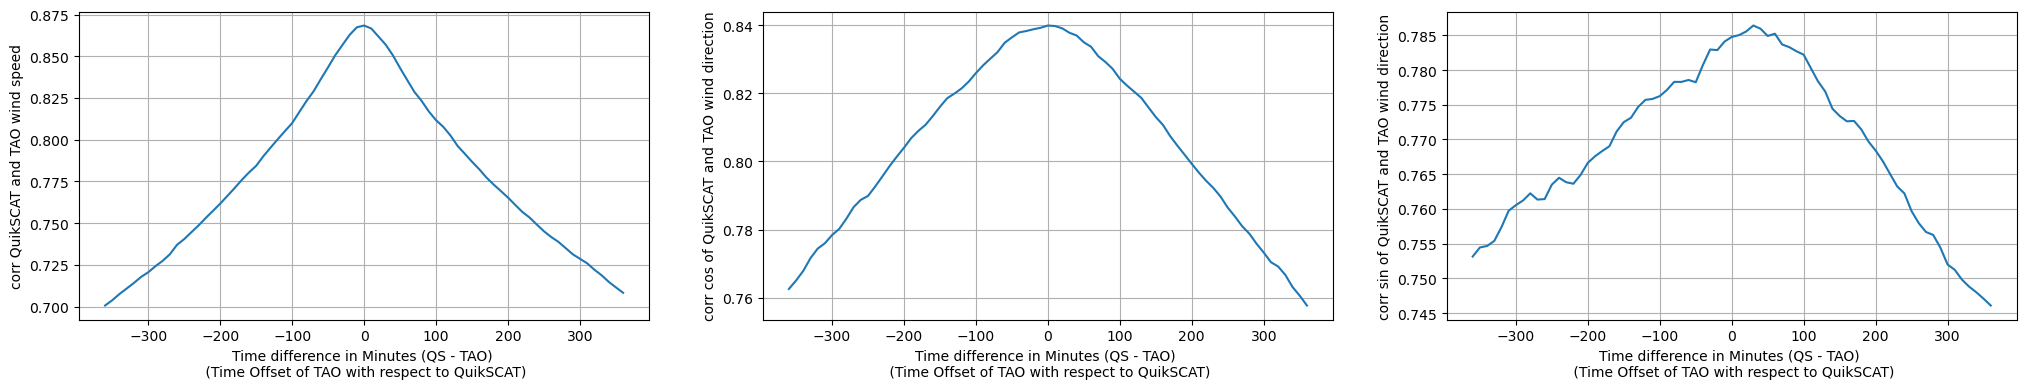

In [16]:
fig, axes = plt.subplots(ncols=3, figsize=(25,4))
ax = axes[0]
ax.plot(np.arange(-36, 37)*10, corr_wspd)
ax.set_xlabel('Time difference in Minutes (QS - TAO) \n (Time Offset of TAO with respect to QuikSCAT)')
ax.set_ylabel('corr QuikSCAT and TAO wind speed')
ax.grid(True)

ax = axes[1]
ax.plot(np.arange(-36, 37)*10, corr_cos_wdir)
ax.set_xlabel('Time difference in Minutes (QS - TAO) \n (Time Offset of TAO with respect to QuikSCAT)')
ax.set_ylabel('corr cos of QuikSCAT and TAO wind direction')
ax.grid(True)

ax = axes[2]
ax.plot(np.arange(-36, 37)*10, corr_sin_wdir)
ax.set_xlabel('Time difference in Minutes (QS - TAO) \n (Time Offset of TAO with respect to QuikSCAT)')
ax.set_ylabel('corr sin of QuikSCAT and TAO wind direction')
ax.grid(True)